In [81]:
import sys
sys.path.insert(0, '../../../../gaps_topology/Tilings') # prepend the path to the Tilings package
import Tilings as tl
import AB_envs as envs
import networkx as nx

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
# replace inline by %matplotlib notebook for full interactivity (but beware of the flickering!)
%matplotlib inline

"""
Styling
See: http://matplotlib.org/users/customizing.html

TeX rendering:
You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache
"""
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern'], 'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# colors
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255
BroccoliGreen = np.array([60., 196., 50.])/255
# linewidth of plots
rc('lines', lw = 2)
# fontsize of the labels
rc('axes', labelsize = 16)
# bbox='tight' tries to make the bounding box fit the plot area
# pad_inches is the distance between the bounding box and the plot area
# see http://matplotlib.org/users/tight_layout_guide.html
rc('savefig', bbox = 'tight', pad_inches = .1)

In [45]:
def fibo(n):
    """ compute the nth Fibonacci number """
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

class FiboWord():
    def __init__(self):
        # the number of inflations
        self._n = 0
        # the current Fibonacci word
        self._word = "B"
        
    def inflate(self):
        # split word in letters
        letters = list(self._word)
        # perform the substitution
        letters = ["AB" if l=="A" else "A" for l in letters]
        # concatenate the letters to obtain the inflated word
        self._word = ''.join(letters)
        
    def chain(self, n):
        """
        Return the chain after n inflations
        """
        for i in range(n):
            self.inflate()
            self._n += 1
        return list(self._word)
    
    def _to_arrow(self, subword):
        """
        Replace the 2 letters subword by the corresponding arrow
        """
        arrow = 0
        if subword == "AB":
            arrow = 1
        elif subword == "BA":
            arrow = -1
        return arrow
    
    def arrows(self):
        if len(str) % 2 != 0:
            print("Odd number of letters in the word. Dropping the last letter.")
        return [self._to_arrow(w) for w in re.findall('..', self._word)]

    def heights(self):
        arrows = self.arrows()
        return np.array([np.sum(arrows[:m]) for m in range(len(arrows))])

In [58]:
tl = FiboWord()
chain = tl.chain(20)
h = tl.heights()

Odd number of letters in the word. Dropping the last letter.


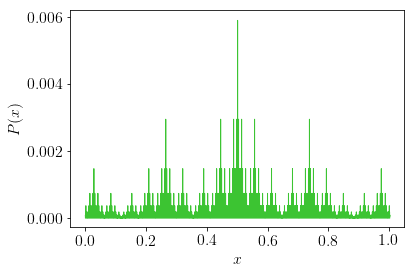

In [83]:
# figure configuration
fig, ax = plt.subplots(1,1)

rho = 0.5
ys = rho**h
ys /= np.sum(ys)
xs = np.linspace(0, 1, len(ys))

ax.plot(xs, ys, '.', ms=0)
ground = np.zeros(len(h))
ax.fill_between(xs, ys, where=ys>=ground, interpolate=False, color=BroccoliGreen)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$P(x)$")
plt.savefig("heights.svg")

In [12]:
len(str)

7